# Fragment Mech Simulation with Reattachment

In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from rmgpy.chemkin import *
from rmgpy.species import Species

In [3]:
from afm.simulator import OdeSimulator
import afm.utils_1_sided
import afm.simulator

/home/yentingw/RMG/RMG-Py/rmgpy/tools/plot.py:31: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/yentingw/anaconda2/envs/rmg_env/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/yentingw/anaconda2/envs/rmg_env/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/yentingw/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/yentingw/anaconda2/envs/rmg_env/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/yentingw/anaconda2/envs/rmg_env/lib/pyth

## 1. specify condition and simulate

In [4]:
temperature = 673.15 # K
pressure = 350*3 # bar

initial_mol_fraction = {
    "ArCC(C)R":1.0,
    "RCCCCR":1.0,
    "RCC":1.0
}
hr = 14
termination_time = 3600*hr # hrs

In [5]:
model = 'one-sided'
working_dir = os.path.join('../', 'data', '2mobenzene', model)
chemkin_path = os.path.join(working_dir, 'chem_annotated.inp')
species_dict_path = os.path.join(working_dir, 'species_dictionary.txt')
smiles_dict_path = os.path.join(working_dir, 'fragment_smiles.txt')

In [6]:
ode_simulator = OdeSimulator(chemkin_path,
                             species_dict_path,
                             smiles_dict_path,
                             temperature,
                             pressure)

In [7]:
alldata = ode_simulator.simulate(initial_mol_fraction, termination_time)

In [8]:
results_path = os.path.join(working_dir, 'results')
if not os.path.exists(results_path):
    os.mkdir(results_path)

## 2. reactant conversion

In [9]:
# prepare moles data
time, dataList, _ = alldata[0]
TData = dataList[0]
PData = dataList[1]
VData = dataList[2]
total_moles = PData.data*VData.data/8.314/TData.data

moles_dict = {}
for data in dataList[3:]:
    spe_label = data.label
    moles_dict[spe_label] = max(data.data[-1]*total_moles[-1],0)

In [10]:
moles_dict

{'Ar': 0.0,
 'Ar*': 3.7151826214527513e-12,
 'ArAr': 87.98537273963133,
 'ArC': 966.66667237527258,
 'ArC(C*)C(C)R': 0.0,
 'ArC(C*CCR)C(C)R': 0.0,
 'ArC(CC*CR)C(C)R': 2.8321915865723084e-07,
 'ArC(CCC*R)C(C)R': 0.0,
 'ArC(CCCCR)C(C)R': 0.0,
 'ArC(CCCR)C(C)R': 0.0,
 'ArC(CCCR)C(C*)R': 0.0,
 'ArC(CCCR)C*(C)R': 0.0,
 'ArC(CCCR)__CR': 0.0,
 'ArC(C__C)C(C)R': 0.0,
 'ArC(__C)C(C)R': 0.0,
 'ArC*': 3.7790490861129846e-06,
 'ArC*(CCCCR)C(C)R': 0.0,
 'ArC*(CCCR)C(C)R': 0.0,
 'ArC*C': 0.0,
 'ArC*C(C)R': 3.6761977319199354e-05,
 'ArCC': 0.0,
 'ArCC(C)R': 5105.8125751726866,
 'ArCC(C*)R': 4.7807428117421798e-08,
 'ArCC*': 0.0,
 'ArCC*(C)R': 8.6874306014693255e-07,
 'ArCC*R': 1.0409283822781981e-05,
 'ArCCC': 0.0,
 'ArCCC*': 0.0,
 'ArCC__C': 0.0,
 'ArC__C': 0.0,
 'ArC__C(C)R': 0.0,
 'ArC__CCCR': 0.0,
 'ArC__CR': 5.381431681518408,
 'C*': 8.5438501609652172e-07,
 'C__C': 9.7429821896608475e-05,
 'H*': 1.2703230800610122e-19,
 'H2': 8.838103354025983e-06,
 'RC': 535.43305780817627,
 'RC(C)C': 1.113202

In [11]:
ArCC_C_CR_mf = dataList[3].data
print dataList[3].label
print dataList[3].data
ArCC_C_CR_moles = ArCC_C_CR_mf*total_moles # total_moles is an array in the form of tuple and list in the tuple
ArCC_C_CR_conv = (ArCC_C_CR_moles[0]-ArCC_C_CR_moles)/ArCC_C_CR_moles[0]

ArCC(C)R
[ 0.33333333  0.33333333  0.33333333 ...,  0.25357889  0.25332287
  0.25306813]


In [12]:
ArCC_C_CR_conv

array([  0.00000000e+00,   4.95916295e-14,   1.46302578e-13, ...,
         1.82334418e-01,   1.82953896e-01,   1.83570489e-01])

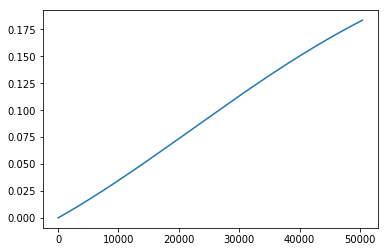

In [13]:
plt.plot(time.data, ArCC_C_CR_conv)
numpy.savetxt(os.path.join(results_path, 'reactant_conv.csv'), (time.data, ArCC_C_CR_conv))

## 3. molecular weight distribution

In [ ]:
from afm.simulator import categorize_fragments

In [ ]:
fragmental_weight_distri = ode_simulator.get_molecular_weight_distribution(alldata)

> /home/yentingw/AutoFragmentModeling/afm/simulator.py(171)get_molecular_weight_distribution()
-> final_frags_moles = []
(Pdb) flattened_matches
[(('RCC', 'RCCCCR', 'RCC', 'RCCCCR', 'RCCCCR'), 5.0), (('ArCC(C)R', 'RCCCCR', 'ArCC(C)R', 'RCCCCR', 'RCCCCR'), 5.0), (('RC', 'RCCCCR', 'RC', 'RCCCCR', 'RCCCCR'), 5.0), (('RCC', 'RCCCCR', 'RCC', 'RCCCCR', 'RCCCCR'), 5.0), (('ArCC(C)R', 'RCCCCR', 'ArCC(C)R', 'RCCCCR', 'RCCCCR'), 5.0), (('RCC', 'RCCCCR', 'RCC', 'RCCCCR', 'RCCCCR'), 5.0), (('ArCC(C)R', 'ArCC(C)R', 'RCCCCR', 'RCCCCR'), 5.0), (('ArCC(C)R', 'ArCC(C)R', 'RCCCCR', 'RCCCCR'), 5.0), (('ArCC(C)R', 'RCCCCR', 'ArCC(C)R', 'RCCCCR', 'RCCCCR'), 5.0), (('ArCC(C)R', 'RCCCCR', 'ArCC(C)R', 'RCCCCR', 'RCCCCR'), 5.0), (('RC__C', 'ArCC(C)R', 'RCCCCR', 'RCCCCR'), 5.0), (('RC__C', 'ArCC(C)R', 'RCCCCR', 'RCCCCR'), 5.0), (('RCC', 'RCCCCR', 'RCC', 'RCCCCR', 'RCCCCR'), 5.0), (('RCC', 'RCCCCR', 'RCC', 'RCCCCR', 'RCCCCR'), 5.0), (('ArCC(C)R', 'RCCCCR', 'ArCC(C)R', 'RCCCCR', 'RCCCCR'), 5.0), (('RC__C', 'RCC__

In [ ]:
fragmental_weight_distri

In [ ]:
mws = [tup[0]*1000 for tup in fragmental_weight_distri]
moles = [tup[1] for tup in fragmental_weight_distri]

molefracs = moles/sum(moles)

In [ ]:
numpy.savetxt(os.path.join(results_path, 'mwd_{0}hr.csv'.format(hr)), (mws, molefracs))